In [ ]:
# Import necessary libraries for data handling and random data generation numpy and pandas for data manipulation, random for randomness, Faker for generating fake data Initialize Faker for generating fake transaction dates
# Define the number of customers and maximum transactions per customer
# Generate unique customer IDs in the format "CUST000001" to "CUST002000"
# Create a transaction dataset with random transactions for each customer
#  Assigns a unique transaction ID
# Generates a random transaction amount between 10 and 1000
#  Randomly selects a transaction type (deposit or withdrawal)
#  Assigns a random date within the last year
# Convert the transaction list into a pandas DataFrame
# Display the first few rows of the transaction dataset

import numpy as np
import pandas as pd
import random
from faker import Faker

#fake = Faker()

num_customers = 2000
max_transactions_per_customer = 20 

customers = [f"CUST{str(i).zfill(6)}" for i in range(1, num_customers + 1)]

transaction_data = []
for customer_id in customers:
    num_transactions = random.randint(1, max_transactions_per_customer)
    for _ in range(num_transactions):
        transaction_data.append({
            "customer_id": customer_id,
            "transaction_id": f"TRANS{str(len(transaction_data) + 1).zfill(6)}",
            "transaction_amount": np.random.uniform(10, 1000),
            "transaction_type": random.choice(["deposit", "withdrawal"]),
            "transaction_date": fake.date_between(start_date='-1y', end_date='today'),
        })

transaction_data = pd.DataFrame(transaction_data)

transaction_data.head()

In [1]:
import numpy as np
import pandas as pd
import random

In [ ]:
!pip install faker

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
transaction_data.to_csv("customer_data.csv",index=False)

In [2]:
transaction_data = pd.read_csv(r"D:\1 DS PROJECTS\DS final project 1\customer_data.csv")

In [3]:
# Check the shape of the transaction dataset (number of rows and columns)
transaction_data.shape

(20908, 5)

In [4]:
# Display the index of the transaction dataset
transaction_data.index

RangeIndex(start=0, stop=20908, step=1)

In [5]:
# List all column names in the transaction dataset
transaction_data.columns

Index(['customer_id', 'transaction_id', 'transaction_amount',
       'transaction_type', 'transaction_date'],
      dtype='object')

In [6]:
# Check the data types of each column in the transaction dataset
transaction_data.dtypes

customer_id            object
transaction_id         object
transaction_amount    float64
transaction_type       object
transaction_date       object
dtype: object

In [7]:
# Get the unique transaction types present in the dataset
transaction_data['transaction_type'].unique()

array(['deposit', 'withdrawal'], dtype=object)

In [ ]:
# Get the number of unique values in each column of the dataset
transaction_data.nunique

In [ ]:
# Count the number of missing (null) values in each column of the dataset
transaction_data.isnull().sum()

In [ ]:
# Count the number of non-null values in each column of the dataset
transaction_data.count()

In [ ]:
# Get the count of each transaction type (deposit/withdrawal) in the dataset
transaction_data['transaction_type'].value_counts()

In [ ]:
# Get the count of each unique transaction date in the dataset
transaction_data['transaction_date'].value_counts()

In [ ]:
# Display summary information about the dataset, including the number of non-null entries and data types of each column
transaction_data.info()

In [14]:
# Display the first few rows of the transaction dataset to get an overview of the data
transaction_data.head()

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date
0,CUST000001,TRANS000001,457.873559,deposit,2024-02-08
1,CUST000001,TRANS000002,424.591341,deposit,2024-11-06
2,CUST000001,TRANS000003,759.745190,deposit,2024-03-28
3,CUST000001,TRANS000004,125.176877,deposit,2024-10-08
4,CUST000001,TRANS000005,260.107422,deposit,2024-11-04


In [1]:
# Import matplotlib for data visualization and seaborn for enhanced plotting
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

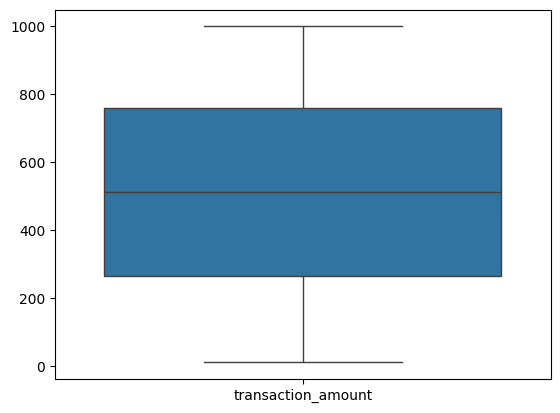

In [16]:
# Create a boxplot to visualize the distribution and outliers in the transaction dataset
sns.boxplot(data=transaction_data)

In [17]:
#CONVERTING THE RUPEES TO DOLLAR
transaction_data["transaction_amount"] = transaction_data["transaction_amount"]/86.66

In [18]:
#ROUNDING THE COLUMNS VALUES
transaction_data['transaction_amount'] = transaction_data['transaction_amount'].round(1).astype(float)

In [19]:
# Display the first 10 rows of the transaction dataset for a closer look
transaction_data.head(10)

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date
0,CUST000001,TRANS000001,5.3,deposit,2024-02-08
1,CUST000001,TRANS000002,4.9,deposit,2024-11-06
2,CUST000001,TRANS000003,8.8,deposit,2024-03-28
3,CUST000001,TRANS000004,1.4,deposit,2024-10-08
4,CUST000001,TRANS000005,3.0,deposit,2024-11-04
5,CUST000001,TRANS000006,3.1,deposit,2024-06-12
6,CUST000001,TRANS000007,7.7,withdrawal,2024-07-02
7,CUST000001,TRANS000008,7.3,deposit,2024-03-28
8,CUST000001,TRANS000009,9.6,withdrawal,2024-05-14
9,CUST000001,TRANS000010,5.4,deposit,2024-10-21


In [20]:
#SEPARATE THE COLUMNS USING THE LOOPS
# Loop through each element (transaction type) and create a new column with the corresponding transaction amount
# - For each transaction type, create a new column with the transaction amount if the condition is met, otherwise set it to None

elements = ['withdrawal','deposit']

for element in elements:
    Tranformed_Columns = transaction_data['transaction_type'] == element
    transaction_data[f'{element}_Value'] = transaction_data['transaction_amount'].where(Tranformed_Columns,None)

In [21]:
# Display the first few rows of the updated transaction dataset with new columns for each transaction type's amount
transaction_data.head(20)

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date,withdrawal_Value,deposit_Value
0,CUST000001,TRANS000001,5.3,deposit,2024-02-08,NaN,5.3
1,CUST000001,TRANS000002,4.9,deposit,2024-11-06,NaN,4.9
2,CUST000001,TRANS000003,8.8,deposit,2024-03-28,NaN,8.8
3,CUST000001,TRANS000004,1.4,deposit,2024-10-08,NaN,1.4
4,CUST000001,TRANS000005,3.0,deposit,2024-11-04,NaN,3.0
5,CUST000001,TRANS000006,3.1,deposit,2024-06-12,NaN,3.1
6,CUST000001,TRANS000007,7.7,withdrawal,2024-07-02,7.7,NaN
7,CUST000001,TRANS000008,7.3,deposit,2024-03-28,NaN,7.3
8,CUST000001,TRANS000009,9.6,withdrawal,2024-05-14,9.6,NaN
9,CUST000001,TRANS000010,5.4,deposit,2024-10-21,NaN,5.4


In [22]:
# Replace all missing (NaN) values in the dataset with 0
transaction_data.fillna(0,inplace=True)

In [23]:
# Display the first few rows of the transaction dataset again to verify the changes
transaction_data.head()

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date,withdrawal_Value,deposit_Value
0,CUST000001,TRANS000001,5.3,deposit,2024-02-08,0.0,5.3
1,CUST000001,TRANS000002,4.9,deposit,2024-11-06,0.0,4.9
2,CUST000001,TRANS000003,8.8,deposit,2024-03-28,0.0,8.8
3,CUST000001,TRANS000004,1.4,deposit,2024-10-08,0.0,1.4
4,CUST000001,TRANS000005,3.0,deposit,2024-11-04,0.0,3.0


In [24]:

# Group the transaction data by customer_id and aggregate:
# - Total number of transactions per customer
# - Total transaction amount per customer
# - Average transaction amount per customer
# - Number of deposits and withdrawals for each customer
# - Total amount of withdrawals and deposits for each customer
# Reset the index to create a clean customer-level dataset

customer_data = transaction_data.groupby("customer_id").agg(
    total_transactions=("transaction_id", "count"),
    total_amount=("transaction_amount", "sum"),
    avg_transaction_amount=("transaction_amount", "mean"),
    
    num_deposits=("transaction_type", lambda x: (x == "deposit").sum()),
    num_withdrawals=("transaction_type", lambda x: (x == "withdrawal").sum()),
    withdrawals_amount=("withdrawal_Value",'sum'),
    deposits_amount=("deposit_Value",'sum')
).reset_index()
customer_data.head()

,customer_id,total_transactions,total_amount,avg_transaction_amount,num_deposits,num_withdrawals,withdrawals_amount,deposits_amount
0,CUST000001,11,63.0,5.727273,9,2,17.3,45.7
1,CUST000002,4,24.3,6.075000,3,1,7.7,16.6
2,CUST000003,20,106.9,5.345000,9,11,50.2,56.7
3,CUST000004,13,76.5,5.884615,7,6,30.3,46.2
4,CUST000005,5,29.7,5.940000,3,2,6.6,23.1


<Axes: xlabel='customer_id', ylabel='total_amount'>

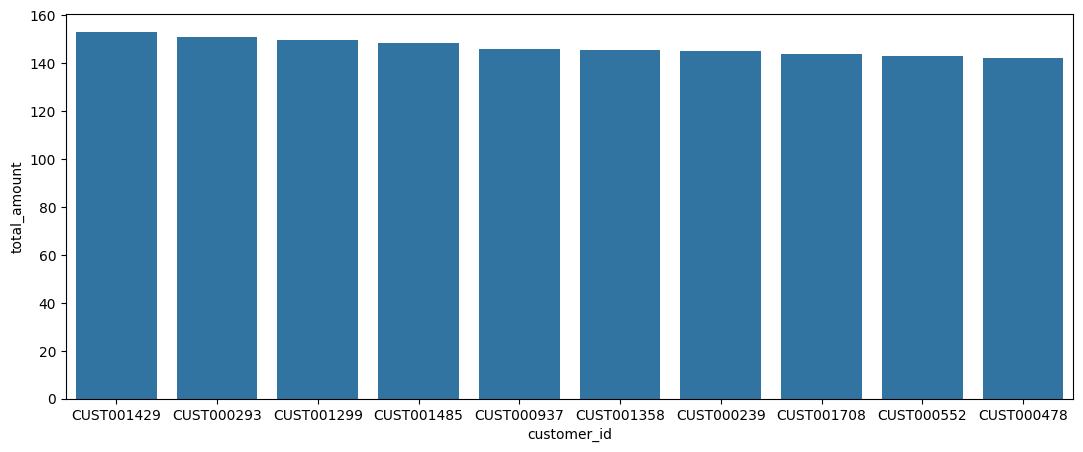

In [25]:
# Sort the customer data by total transaction amount in descending order and get the top 10 customers
# - Plot a bar chart showing the total transaction amount for the top 10 customers using seaborn
top_10 = customer_data[["customer_id","total_transactions","total_amount"]].sort_values(by='total_amount', ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x="customer_id",y="total_amount",data=top_10)


<Axes: xlabel='customer_id', ylabel='withdrawals_amount'>

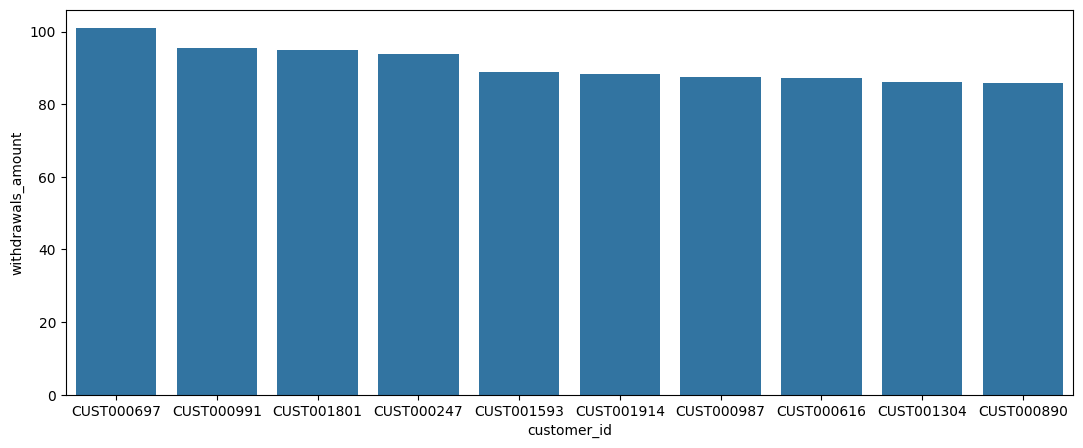

In [26]:
# Sort the customer data by withdrawal amount in descending order and get the top 10 customers
# - Plot a bar chart showing the withdrawal amount for the top 10 customers using seaborn
top_10 = customer_data[["customer_id","withdrawals_amount","deposits_amount"]].sort_values(by='withdrawals_amount', ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x="customer_id",y="withdrawals_amount",data=top_10)

<Axes: xlabel='customer_id', ylabel='deposits_amount'>

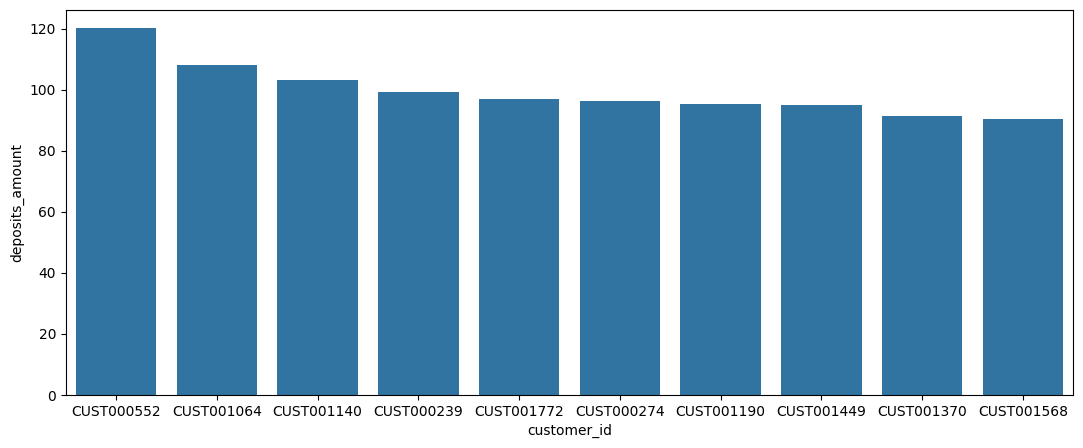

In [27]:
# Sort the customer data by deposit amount in descending order and get the top 10 customers
# - Plot a bar chart showing the deposit amount for the top 10 customers using seaborn
top_10 = customer_data[["customer_id","withdrawals_amount","deposits_amount"]].sort_values(by='deposits_amount', ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x="customer_id",y="deposits_amount",data=top_10)

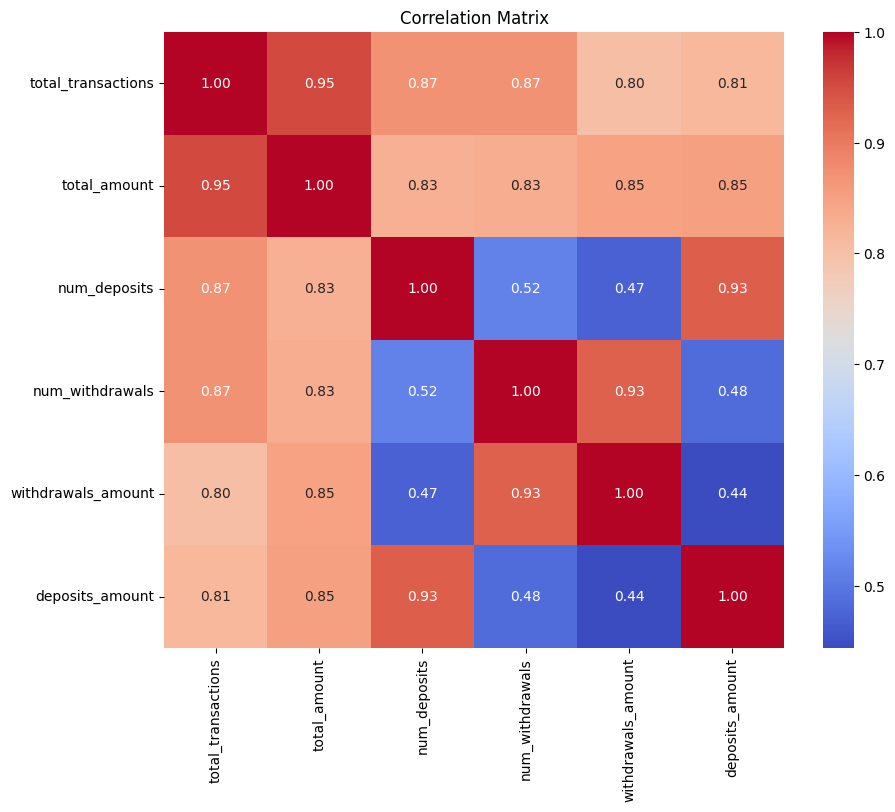

In [28]:
#CHECKING THE CORRELATION FOR NUMERIC COLUMNS USING HEATMAP
correlation_matrix = customer_data[["total_transactions", "total_amount", 
                                    "num_deposits", "num_withdrawals", "withdrawals_amount", "deposits_amount"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

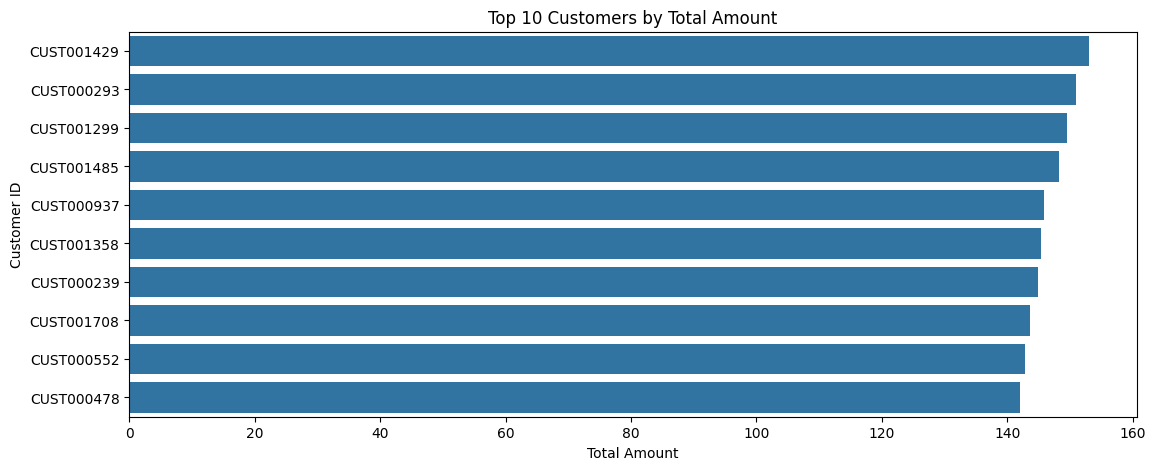

In [29]:
# SELECT TOP 10 CUSTOMERS BASED ON TOTAL AMOUNT IN DESCENDING ORDER
top_10 = customer_data[["customer_id","total_transactions","total_amount"]].sort_values(by='total_amount', ascending=False).head(10)
plt.figure(figsize=(13, 5))
sns.barplot(y="customer_id", x="total_amount", data=top_10, orient='h')
plt.xlabel("Total Amount")
plt.ylabel("Customer ID")
plt.title("Top 10 Customers by Total Amount")
plt.show()

In [30]:
customer_data.head(20)

,customer_id,total_transactions,total_amount,avg_transaction_amount,num_deposits,num_withdrawals,withdrawals_amount,deposits_amount
0,CUST000001,11,63.0,5.727273,9,2,17.3,45.7
1,CUST000002,4,24.3,6.075000,3,1,7.7,16.6
2,CUST000003,20,106.9,5.345000,9,11,50.2,56.7
3,CUST000004,13,76.5,5.884615,7,6,30.3,46.2
4,CUST000005,5,29.7,5.940000,3,2,6.6,23.1
5,CUST000006,11,81.4,7.400000,3,8,65.1,16.3
6,CUST000007,6,39.1,6.516667,3,3,20.8,18.3
7,CUST000008,6,32.1,5.350000,3,3,14.5,17.6
8,CUST000009,14,86.3,6.164286,4,10,68.1,18.2
9,CUST000010,8,43.8,5.475000,3,5,25.6,18.2


In [31]:
Q1 = customer_data['deposits_amount'].quantile(0.25)
Q3 = customer_data['deposits_amount'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = customer_data[(customer_data['deposits_amount'] < lower_bound) | (customer_data['deposits_amount'] > upper_bound)]

# Display results
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
outliers

Lower bound: -34.98749999999998
Upper bound: 93.51249999999999


,customer_id,total_transactions,total_amount,avg_transaction_amount,num_deposits,num_withdrawals,withdrawals_amount,deposits_amount
238,CUST000239,19,144.9,7.626316,13,6,45.8,99.1
273,CUST000274,19,134.3,7.068421,12,7,38.2,96.1
551,CUST000552,20,142.8,7.140000,16,4,22.6,120.2
1063,CUST001064,20,131.3,6.565000,15,5,23.4,107.9
1139,CUST001140,20,140.8,7.040000,14,6,37.7,103.1
1189,CUST001190,19,128.4,6.757895,13,6,33.1,95.3
1448,CUST001449,19,132.6,6.978947,14,5,37.7,94.9
1771,CUST001772,16,115.1,7.193750,12,4,18.3,96.8


In [32]:
Q1 = customer_data['withdrawals_amount'].quantile(0.25)
Q3 = customer_data['withdrawals_amount'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = customer_data[(customer_data['withdrawals_amount'] < lower_bound) | (customer_data['withdrawals_amount'] > upper_bound)]

# Display results
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
outliers

Lower bound: -32.650000000000006
Upper bound: 92.55000000000001


,customer_id,total_transactions,total_amount,avg_transaction_amount,num_deposits,num_withdrawals,withdrawals_amount,deposits_amount
246,CUST000247,19,131.1,6.900000,6,13,93.7,37.4
696,CUST000697,20,137.5,6.875000,5,15,101.0,36.5
990,CUST000991,20,107.2,5.360000,5,15,95.5,11.7
1800,CUST001801,19,128.8,6.778947,7,12,95.0,33.8


In [33]:
# Remove outliers
customer_data = customer_data[
    (customer_data['withdrawals_amount'] >= lower_bound) & 
    (customer_data['withdrawals_amount'] <= upper_bound)
]

In [34]:
# Remove outliers
customer_data = customer_data[
    (customer_data['deposits_amount'] >= lower_bound) & 
    (customer_data['deposits_amount'] <= upper_bound)
]

In [35]:
customer_data.head()

,customer_id,total_transactions,total_amount,avg_transaction_amount,num_deposits,num_withdrawals,withdrawals_amount,deposits_amount
0,CUST000001,11,63.0,5.727273,9,2,17.3,45.7
1,CUST000002,4,24.3,6.075000,3,1,7.7,16.6
2,CUST000003,20,106.9,5.345000,9,11,50.2,56.7
3,CUST000004,13,76.5,5.884615,7,6,30.3,46.2
4,CUST000005,5,29.7,5.940000,3,2,6.6,23.1


In [ ]:
pip install scikit-learn

In [36]:
# Import StandardScaler from sklearn to scale the features of the customer data
# Select the features to be scaled
# Scale the selected features (normalize them to have mean 0 and variance 1)
# Create a new DataFrame with the scaled values for easy inspection
from sklearn.preprocessing import StandardScaler

features = ["total_transactions", "total_amount", "num_deposits", "num_withdrawals","withdrawals_amount","deposits_amount"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])

scaled_customer_data = pd.DataFrame(scaled_features, columns=features)

scaled_customer_data.head()

,total_transactions,total_amount,num_deposits,num_withdrawals,withdrawals_amount,deposits_amount
0,0.104620,0.051699,1.180210,-0.994235,-0.664540,0.755854
1,-1.118822,-1.051112,-0.654237,-1.299068,-1.130920,-0.663828
2,1.677618,1.302692,1.180210,1.749265,0.933785,1.292504
3,0.454175,0.436401,0.568728,0.225098,-0.032983,0.780248
4,-0.944045,-0.897232,-0.654237,-0.994235,-1.184359,-0.346717


In [ ]:
# Apply KMeans clustering with 2 clusters on the scaled customer data
# Assign each customer to a cluster and add the cluster labels to the customer_data DataFrame
from sklearn.cluster import KMeans

In [38]:
# TRAIN THE DATA USING KMEANS CLUSTERING
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300, algorithm='lloyd')

customer_data['cluster'] = kmeans.fit_predict(scaled_customer_data)

Silhouette Score: 0.5
Davies-Bouldin Index: 0.7493311861378843


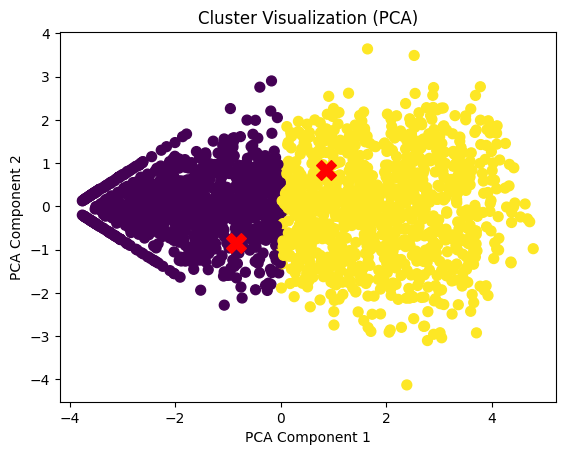

In [39]:
# Calculate the silhouette score and Davies-Bouldin index to evaluate the clustering performance
# Silhouette score indicates how similar the points are within their own cluster
# Davies-Bouldin index measures the average similarity ratio of each cluster to the cluster that is most similar to it

# Perform PCA (Principal Component Analysis) to reduce data dimensions to 2 for visualization
# Plot the 2D scatter plot of the clustered data points and highlight the cluster centers in red

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Metrics
silhouette = silhouette_score(scaled_features, customer_data["cluster"])
db_index = davies_bouldin_score(scaled_features, customer_data["cluster"])
print(f"Silhouette Score: {round(silhouette,1)}")
print(f"Davies-Bouldin Index: {db_index}")

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=customer_data["cluster"], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [24]:
# Import the joblib library to save and load machine learning models and other objects
import joblib

In [26]:
# Save the customer_data DataFrame to a file using joblib for later use or sharing
# The file is saved in the specified path with the .pkl extension
joblib.dump(kmeans, r"D:\1 DS PROJECTS\DS final project 1\save file.pkl")

['D:\\1 DS PROJECTS\\DS final project 1\\save file.pkl']

In [27]:
# Save the scaled_customer_data DataFrame (which contains the scaled features) to a .pkl file using joblib
# The file is saved in the specified path for future use
joblib.dump(scaler,r"D:\1 DS PROJECTS\DS final project 1\scaler.pkl")

['D:\\1 DS PROJECTS\\DS final project 1\\scaler.pkl']

In [47]:
with open(r"D:\1 DS PROJECTS\DS final project 1\save file.pkl", "rb") as f:
    print(f.read(100))  # Read the first 100 bytes


b'\x80\x04\x95c\x01\x00\x00\x00\x00\x00\x00\x8c\x11pandas.core.frame\x94\x8c\tDataFrame\x94\x93\x94)\x81\x94}\x94(\x8c\x04_mgr\x94\x8c\x1epandas.core.internals.managers\x94\x8c\x0cBlockMa'


In [ ]:
import pandas as pd
df = joblib.load(r"D:\1 DS PROJECTS\DS final project 1\save file.pkl")


In [ ]:
pip install scikit-learn==1.3.2

In [109]:
from sklearn.cluster import DBSCAN
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed
customer_data["cluster"] = dbscan.fit_predict(scaled_features)


In [57]:
# Check if there are more than one cluster in the data
# If true, calculate the silhouette score and Davies-Bouldin index to evaluate clustering quality
# If only one cluster is found, print a message stating the silhouette score is not defined

if len(set(customer_data["cluster"])) > 1:  # Ensure there is more than one cluster
    silhouette = silhouette_score(scaled_features, customer_data["cluster"])
    db_index = davies_bouldin_score(scaled_features, customer_data["cluster"])
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {db_index}")
else:
    print("DBSCAN found less than two clusters; Silhouette Score is not defined.")

Silhouette Score: 0.018299907452053173
Davies-Bouldin Index: 1.6472180737702822


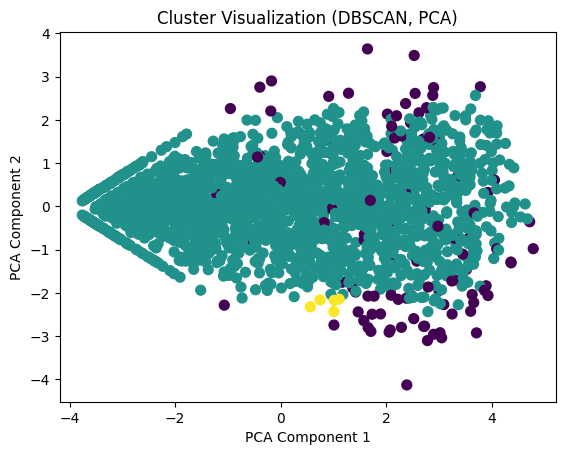

In [58]:
# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=customer_data["cluster"], cmap='viridis', s=50)
plt.title('Cluster Visualization (DBSCAN, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3)
scaled_customer_data['cluster'] = hc.fit_predict(scaled_customer_data)

# Plot dendrogram
sch.dendrogram(sch.linkage(scaled_customer_data[features], method='ward'))


Silhouette Score: 0.3890958260224722
Davies-Bouldin Index: 1.132232164036137


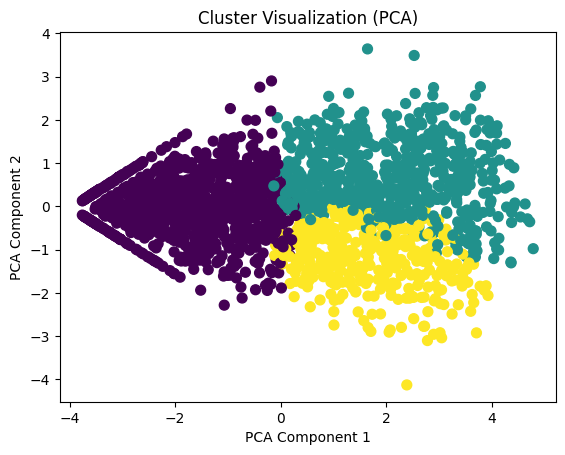

In [60]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calculate silhouette score and Davies-Bouldin index for hierarchical clustering
silhouette = silhouette_score(scaled_features, scaled_customer_data["cluster"])
db_index = davies_bouldin_score(scaled_features, scaled_customer_data["cluster"])

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=scaled_customer_data["cluster"], cmap='viridis', s=50)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
